# Evaluate Models

In this example we will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

## Import the data
Import the data, get X and y and split into test and train 

In [2]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

What percentage of the observations in the dataset are instances of fraud?

In [3]:
percentage = y.value_counts()
percentage = percentage[1]/(percentage[1]+percentage[0])
    
print("percentage: ",percentage)


percentage:  0.016410823768035772


### Evaluate the Dummy classifier

If we use a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?


In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

accuracy = accuracy_score(y_test, y_dummy_predictions)

recall = recall_score(y_test, y_dummy_predictions)

print("Accuracy:",accuracy)
print("Recall: ", recall)

Accuracy: 0.9852507374631269
Recall:  0.0


### Evaluate the SVC model

If we use a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?


In [5]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)
y_predict = clf.predict(X_test)


Score_acc = accuracy_score(y_test, y_predict)
Score_prec = precision_score(y_test, y_predict)
Score_rec = recall_score(y_test, y_predict)

print("Accuracy:",Score_acc)
print("Precision",Score_prec)
print("Recall: ",Score_rec)

/home/adrian/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.9907817109144543
Precision 1.0
Recall:  0.375


### Confusion matrix

Get the Confusion Matrix of a SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, with a threshold of -220 on the decision function. 

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score

from sklearn.svm import SVC


clf = SVC(gamma = 1e-07, C=1e9).fit(X_train, y_train)
y_predict = clf.decision_function(X_test)

y_predict_threshold = y_predict > -220
confusion = confusion_matrix(y_test, y_predict_threshold)

print("Confusion Matrix")
print(confusion)


Confusion Matrix
[[5320   24]
 [  14   66]]


### Precision Recall curve and RoC curve


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc

#The model
lr = LogisticRegression().fit(X_train, y_train)

y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)

/home/adrian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/adrian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


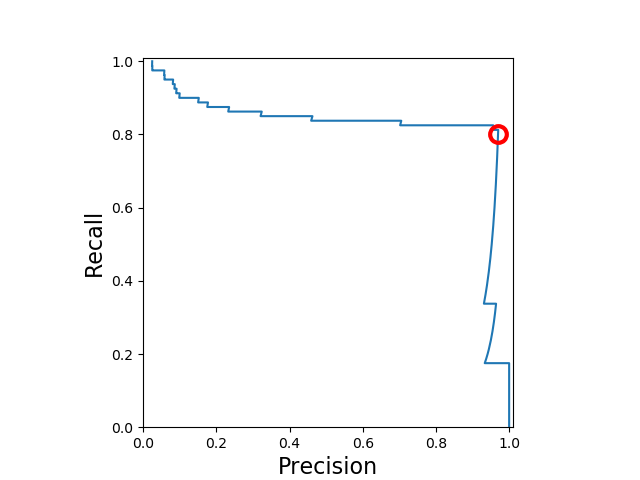

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt

#precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


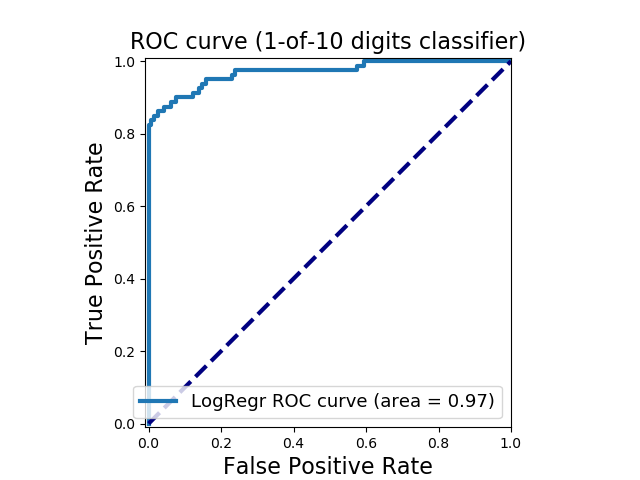

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


In [10]:
#roc curve 
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)

roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Grid search

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

We can create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

grid_values = {'penalty': ['l1', 'l2']
               ,'C':[0.01, 0.1, 1, 10, 100]}

grid_clf_auc = GridSearchCV(lr, param_grid = grid_values
                            , scoring = 'recall'
                            , cv= 3 )
grid_clf_auc.fit(X_train, y_train)
df = pd.DataFrame(grid_clf_auc.cv_results_)
scores = grid_clf_auc.cv_results_['mean_test_score'].reshape(5,2)

print("Scores: ")
print(scores)
df


Scores: 
[[0.66666667 0.76086957]
 [0.80072464 0.80434783]
 [0.8115942  0.8115942 ]
 [0.80797101 0.8115942 ]
 [0.80797101 0.8115942 ]]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026993,0.002536,0.002883,0.000058,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.706522,0.695652,0.597826,0.666667,0.048879,10
1,0.092753,0.003033,0.002766,0.000013,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.804348,0.750000,0.728261,0.760870,0.031999,9
2,0.045495,0.001740,0.005441,0.003680,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.804348,0.836957,0.760870,0.800725,0.031168,8
3,0.156800,0.001441,0.002718,0.000030,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.826087,0.836957,0.750000,0.804348,0.038685,7
4,0.082865,0.005412,0.002724,0.000019,1,l1,"{'C': 1, 'penalty': 'l1'}",0.826087,0.836957,0.771739,0.811594,0.028529,3
5,0.224623,0.021705,0.002796,0.000009,1,l2,"{'C': 1, 'penalty': 'l2'}",0.826087,0.836957,0.771739,0.811594,0.028529,3
6,0.183928,0.079011,0.002847,0.000064,10,l1,"{'C': 10, 'penalty': 'l1'}",0.826087,0.836957,0.760870,0.807971,0.033600,5
7,0.268632,0.036238,0.002988,0.000041,10,l2,"{'C': 10, 'penalty': 'l2'}",0.836957,0.836957,0.760870,0.811594,0.035868,1
8,0.173362,0.056645,0.002957,0.000193,100,l1,"{'C': 100, 'penalty': 'l1'}",0.826087,0.836957,0.760870,0.807971,0.033600,5
9,0.260630,0.023659,0.002926,0.000117,100,l2,"{'C': 100, 'penalty': 'l2'}",0.836957,0.836957,0.760870,0.811594,0.035868,1


### Plot a heatmap from the Grid Search

<IPython.core.display.Javascript object>


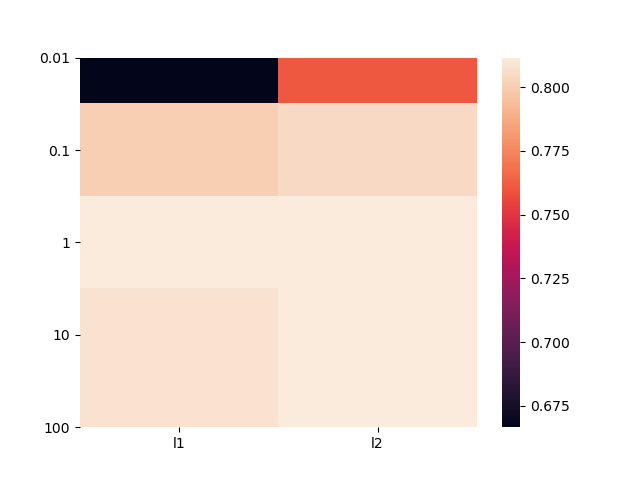

In [12]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
plt.yticks(rotation=0);